In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [9]:
market_data_scaled= StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"]]

)

In [13]:
# Create a DataFrame with the scaled data and name dataframe cds_df (Crypto Data Scaled)
cds_df=pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"]
    
)

# Copy the crypto names from the original data
cds_df["coin_id"]=cds_df.index
# Set the coinid column as index
cds_df=cds_df.set_index("coin_id")


# Display sample data
cds_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [14]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [16]:
# Create an empty list to store the inertia values
inertia =[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model =KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)

C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [19]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_curve = {
    "k":k,
    "inertia":inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data_curve=pd.DataFrame(elbow_data_curve)

In [20]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_curve = df_elbow_data_curve.hvplot.line(x="k",
                                                   y="inertia", 
                                                   title = "Elbow Curve Using Origina Data", 
                                                   xticks = k)
elbow_data_curve

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [23]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [24]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [26]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [27]:
# Create a copy of the DataFrame
df_crypto_data=df_market_data_scaled.copy()

In [28]:
# Add a new column to the DataFrame with the predicted clusters
df_crypto_data["Crypto Clusters"]=crypto_clusters

# Display sample data
df_crypto_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Crypto Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_crypto_data.hvplot.scatter(
            x="price_change_percentage_24h",
            y="price_change_percentage_7d",
            by= "Crypto Clusters",
            hover_cols = ["coin_id"],
            title = "Scatter Plot by Crypto Name"

        )

scatter_plot

:NdOverlay   [Crypto Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [32]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca_data = pca.fit_transform(df_crypto_data)

# View the first five rows of the DataFrame. 
crypto_pca_data[:5]

array([[ 1.19408229, -0.90207402, -0.58533763],
       [ 1.00970605, -0.66358438, -1.13695032],
       [-0.72253591, -0.30763241,  0.7218133 ],
       [-0.74826646, -0.33237895,  0.55847869],
       [ 2.25853853, -1.82696614, -1.37816649]])

In [33]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37269822, 0.32489961, 0.18917649])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [34]:
# Create a new DataFrame with the PCA data.
df_crypto_pca = pd.DataFrame(crypto_pca_data, columns=['PC1',"PC2","PC3"])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_crypto_pca["coin_id"]=df_market_data.index

# Set the coinid column as index
df_crypto_pca=df_crypto_pca.set_index('coin_id')

# Display sample data
df_crypto_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,1.194082,-0.902074,-0.585338
ethereum,1.009706,-0.663584,-1.136950
tether,-0.722536,-0.307632,0.721813
ripple,-0.748266,-0.332379,0.558479
bitcoin-cash,2.258539,-1.826966,-1.378166


---

### Find the Best Value for k Using the PCA Data

In [35]:
# Create a list with the number of k-values from 1 to 11
k =list(range(1,11))

In [37]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model =KMeans(n_clusters=i, random_state=0)
    model.fit(df_crypto_pca)
    inertia.append(model.inertia_)

C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [38]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_crypto_pca = {
    "k": k,
    "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data_crypto_pca = pd.DataFrame(elbow_data_crypto_pca)

In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_crypto_pca = df_elbow_data_crypto_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_data_crypto_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It's the same k value as the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [40]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [41]:
# Fit the K-Means model using the PCA data
model.fit(df_crypto_pca)

C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\josep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [42]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cryto_clusters_pca = model.predict(df_crypto_pca)
# Print the resulting array of cluster values.
print(cryto_clusters_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [43]:
# Create a copy of the DataFrame with the PCA data
df_cryto_clusters_pca=df_crypto_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_cryto_clusters_pca['Crypto Cluster']=cryto_clusters_pca

# Display sample data
df_cryto_clusters_pca.head()

,PC1,PC2,PC3,Crypto Cluster
coin_id,,,,
bitcoin,1.194082,-0.902074,-0.585338,2
ethereum,1.009706,-0.663584,-1.136950,2
tether,-0.722536,-0.307632,0.721813,0
ripple,-0.748266,-0.332379,0.558479,0
bitcoin-cash,2.258539,-1.826966,-1.378166,2


In [44]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_PCA = df_crypto_data.hvplot.scatter(
        x="price_change_percentage_24h",
        y="price_change_percentage_7d",
        by= "Crypto Clusters",
        hover_cols = ["coin_id"],
        title = "Scatter Plot by Crypto Name PCA Data"

    )
scatter_plot_PCA

:NdOverlay   [Crypto Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [46]:
# Composite plot to contrast the Elbow curves
elbow_data_curve + elbow_data_crypto_pca

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [47]:
# Composite plot to contrast the clusters
scatter_plot + scatter_plot_PCA

:Layout
   .NdOverlay.I  :NdOverlay   [Crypto Clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Crypto Clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  Both methods seem to yield very similar results

In [48]:
#Set x= "PC1" and y = "PC2"
scatter_plot_PCA2 = df_cryto_clusters_pca.hvplot.scatter(
        x="PC1",
        y="PC2",
        by= "Crypto Cluster",
        hover_cols = ["coin_id"],
        title = "Scatter Plot by Crypto Name PCA Data"

    )
scatter_plot_PCA2

:NdOverlay   [Crypto Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [49]:
scatter_plot + scatter_plot_PCA2

:Layout
   .NdOverlay.I  :NdOverlay   [Crypto Clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Crypto Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

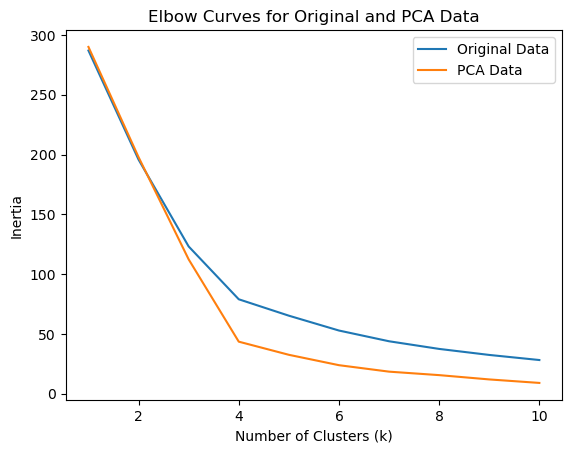

In [50]:
import matplotlib.pyplot as plt

# Plot the first elbow curve
plt.plot(df_elbow_data_curve['k'], df_elbow_data_curve['inertia'], label='Original Data')

# Plot the second elbow curve
plt.plot(df_elbow_data_crypto_pca['k'], df_elbow_data_crypto_pca['inertia'], label='PCA Data')

# Add axis labels and a title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curves for Original and PCA Data')

# Add a legend
plt.legend()

# Display the plot
plt.show()